In [1]:
import numpy as np
import keras
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, Concatenate
from keras.models import Sequential, Model, load_model
from keras.utils.vis_utils import plot_model

from PIL import Image
from skimage.transform import resize
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm


from skimage.transform import resize


Using TensorFlow backend.


In [15]:
model = load_model('model/model_0_1.h5')

In [16]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 480, 480, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 480, 480, 4)       20        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 240, 240, 4)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 240, 240, 4)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 240, 240, 8)       136       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 120, 120, 8)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 120, 120, 8)       0   

In [2]:
mura_decoder = load_model('mura_decoder.h5')
normal_decoder = load_model('normal_decoder.h5')

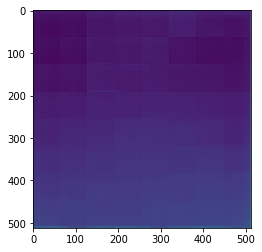

In [3]:
# make mura
new_m = np.random.normal(8, 1, (500,1))
new_v = np.random.normal(77, 4, (500,1))
new_variable = np.hstack((new_m, new_v))
new_variable = np.reshape(new_variable, (500,1,2))

test_input = mura_decoder.predict(new_variable)

img = np.reshape(test_input[0],(512,512))
plt.imshow(img)

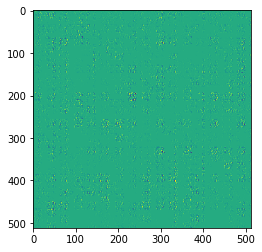

In [4]:
# make normal
new_m = np.random.normal(0, 1, (500,1))
new_v = np.random.normal(0, 4, (500,1))
new_variable = np.hstack((new_m, new_v))
new_variable = np.reshape(new_variable, (500,1,2))

test_input = np.vstack((test_input, normal_decoder.predict(new_variable)))

img = np.reshape(test_input[500],(512,512))
plt.imshow(img)

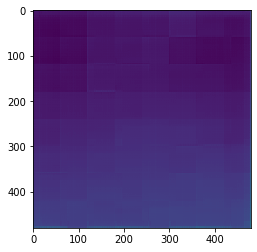

In [5]:
test_input = resize(test_input,((1000,480,480,1)), mode='reflect')
img = np.reshape(test_input[0],(480,480))
plt.imshow(img)

In [12]:
print(test_input.shape)

(1000, 480, 480, 1)


In [3]:
path2 = 'Image_175/0000/W225.bmp'
# path2 = 'Image_310/0002/W225.bmp'
normal_img = np.array(Image.open(path2).convert('L'))


In [23]:
path2 = 'Image_310/0310/W225.bmp'
# path2 = 'Image_310/0002/W225.bmp'
mura_img = np.array(Image.open(path2).convert('L'))


In [561]:
# 정상 노이즈 추가
test_input = []
for i in range(100):
    for j in range(10):
        make_img = normal_img + np.random.normal(0, i, size=normal_img.shape)
        make_img = (255 - make_img)/255
        make_img = resize(make_img,((480,480)), mode='reflect')
        test_input.append([make_img])

In [644]:
# 무라 노이즈 추가
test_input = []
for i in range(100):
    for j in range(10):
        make_img = mura_img + np.random.normal(0, i, size=mura_img.shape)
        make_img = (255 - make_img)/255
        make_img = resize(make_img,((480,480)), mode='reflect')
        test_input.append([make_img])

In [ ]:
# 혼합 노이즈 추가
test_input = []
for i in range(100):
    for j in range(10):
        if j < 5:
            make_img = normal_img + np.random.normal(0, i, size=normal_img.shape)
        else:
            make_img = mura_img + np.random.normal(0, i, size=mura_img.shape)
        make_img = (255 - make_img)/255
        make_img = resize(make_img,((480,480)), mode='reflect')
        test_input.append([make_img])

In [532]:
# 정상 : 0/ 나머지 무라
test_input = []
for i in range(0, 311):
    path = 'Image_310/%s/W225.bmp'%str(i).zfill(4)
    img = np.array(Image.open(path))
    img = (255 - img)/255
    img = resize(img,((480,480)), mode='reflect')
    test_input.append([img])

In [349]:
# 만들어준 정상 데이터 5개
test_input = []
for i in range(1, 6):
    path = 'normal_image/W225_%s.bmp'%str(i).zfill(2)
    img = np.array(Image.open(path).convert('L'))
    img = (255 - img)/255
    img = resize(img,((480,480)), mode='reflect')
    test_input.append([img])

In [8]:
model = load_model('model/model_0_1.h5')

In [9]:
import time
start = time.time()
result = model.predict(test_input)
end = time.time()
print('time: ', end - start)

time:  1.1763904094696045


In [10]:
labels = np.argmax(result, axis=1)

In [11]:
# print(np.resize(labels, (200,5)))
# print(np.resize(labels,(2,500)))
mura_label = np.resize(labels,(2,500))[0]
normal_label = np.resize(labels,(2,500))[1]

In [12]:
mura_index = np.where(mura_label == 0)
normal_index = np.where(normal_label == 1)
print(mura_index)
print(normal_index)

(array([], dtype=int64),)
(array([], dtype=int64),)


In [13]:
mura_error = np.where(mura_label == 0)[0].shape[0]
normal_error = np.where(normal_label == 1)[0].shape[0]

In [14]:
print((500-mura_error)/500)
print((500-normal_error)/500)

1.0
1.0


In [421]:
print(np.mean(test_input[210]))
print(np.var(test_input[210]))

0.51362824
0.0028437176


In [422]:
print(np.mean(test_input[3]))
print(np.var(test_input[3]))

0.6395275
0.014904727


In [423]:
print(np.mean(test_input[600]))
print(np.var(test_input[600]))

0.7249201
1.4272375e-05


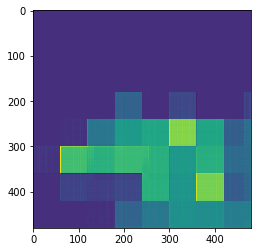

In [384]:
p_img = np.reshape(test_input[127],((480,480)))
p_img = (255*p_img)
plt.imshow(p_img)

In [385]:
cv2.imwrite('test.bmp', p_img)

True

In [6]:
import cv2
mura_img = np.reshape(test_input[:500], (500,480,480))
mura_img = 255 - (255*mura_img)
for i in range(500):
    path = 'make_mura_0/%s.bmp'%str(i).zfill(3)
    cv2.imwrite(path, mura_img[i])

In [7]:
import cv2
normal_img = np.reshape(test_input[500:], (500,480,480))
normal_img = 255 - (255*normal_img)
for i in range(500):
    path = 'make_normal_0/%s.bmp'%str(i).zfill(3)
    cv2.imwrite(path, normal_img[i])

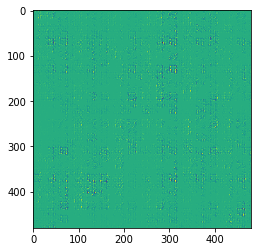

In [343]:
p_img = np.reshape(test_input[505],((480,480)))
plt.imshow(p_img)

In [332]:
print(p_img)

[[0.72450215 0.72518784 0.72643596 ... 0.7254897  0.7254897  0.7254897 ]
 [0.72615993 0.7261992  0.7248633  ... 0.7254897  0.7254897  0.7254897 ]
 [0.7249865  0.7254964  0.726049   ... 0.7254897  0.7254897  0.7254897 ]
 ...
 [0.7269314  0.7272985  0.7240445  ... 0.7254897  0.7254897  0.7254897 ]
 [0.72460955 0.7255225  0.7272787  ... 0.7254897  0.7254897  0.7254897 ]
 [0.72271156 0.7266905  0.7243653  ... 0.7254897  0.7254897  0.7254897 ]]


In [333]:
import cv2
cv2.imwrite("normal.bmp", p_img)

True

In [195]:
print(np.var(p_img))

0.08397165444266176


In [14]:
true_label = np.zeros(5)
# true_label[1:] = 1

check_label = np.zeros(5)

In [15]:
for i in range(labels.shape[0]):
    if labels[i] == 1:
        print('%s : mura' %str(i).zfill(4)) 
        check_label[i] = 1
    else:
        print('%s : normal'  %str(i).zfill(4))
        check_label[i] = 0

0000 : normal
0001 : normal
0002 : normal
0003 : normal
0004 : normal


In [145]:
error = ((true_label + check_label) % 2).sum()
accuracy = (true_label.shape[0]-error)/true_label.shape[0]
print('accuray : ', accuracy)

accuray :  0.9968051118210862


In [334]:
# path2 = 'normal_image/W225_04.bmp'
path2 = 'Image_310/0002/W225.bmp'
img = np.array(Image.open(path2).convert('L'))
img = (255 - img)/255
img = resize(img,((480,480)), mode='reflect')

In [335]:
print(img)

[[0.8382037  0.78720473 0.78323423 ... 0.77125859 0.77788272 0.84939094]
 [0.80966303 0.74605698 0.74192749 ... 0.74226678 0.75017755 0.83021855]
 [0.80899795 0.7447911  0.73999019 ... 0.74153807 0.74953813 0.83117701]
 ...
 [0.84135439 0.75710255 0.74751387 ... 0.75008613 0.7591402  0.83119306]
 [0.84447862 0.76267503 0.75055944 ... 0.75490625 0.76293618 0.8325439 ]
 [0.87033915 0.79920814 0.79185976 ... 0.78705518 0.7929886  0.85309165]]


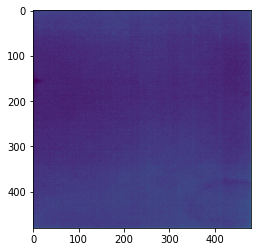

In [336]:
import matplotlib.pyplot as plt 
plt.imshow(img)

In [337]:
import cv2
cv2.imwrite("real_mura.bmp", img)

True

In [9]:
np.var(img)

1.1771316718456126e-06

In [176]:
img = np.reshape(img, (1,480,480,1))


In [177]:
result = model.predict(img)

In [178]:
print(np.argmax(result))

0


In [172]:
model = load_model('model/model_2_1.h5')